In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


# Breast Cancer Wisconsin

In [ ]:
#Breast Cancer Wisconsin
from google.colab import files
data_to_load = files.upload()

Saving data.csv to data.csv


In [ ]:
X = pd.read_csv('data.csv')

In [ ]:
X['diagnosis'][X['diagnosis'] == 'M'] = 1
X['diagnosis'][X['diagnosis'] == 'B'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X.drop('Unnamed: 32', axis=1, inplace=True)

In [ ]:
y = X.pop('diagnosis')

In [ ]:
X.drop('id', axis=1, inplace=True)

In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X.isnull().values.any()

False

In [ ]:
X.shape

(569, 30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 18.7 MB/s 
     |████████████████████████████████| 210 kB 51.8 MB/s 
     |████████████████████████████████| 81 kB 8.3 MB/s 
     |████████████████████████████████| 78 kB 6.4 MB/s 
     |████████████████████████████████| 113 kB 56.8 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 146 kB 52.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=bc1fe26fbec908798a1082e3657c8b7965bae00585350de4e2dd48eb13138e98
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna

In [ ]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

# Grid Serach

In [ ]:
def objective_gs(trial):
    C_vals = trial.suggest_float("C", 1e-5, 1e5)
    gamma_vals = trial.suggest_float('gamma', 1e-5, 1e5)
    clf_obj = SVC(kernel='rbf', C=C_vals, gamma=gamma_vals)
    score = cross_val_score(clf_obj, X_train, y_train.astype('int'), scoring='accuracy', n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy

In [ ]:
%%time
search_space = {'C': np.logspace(-5, 5, 20), 'gamma': np.logspace(-5, 5 ,20)}
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.GridSampler(search_space))
study.optimize(objective_gs)

CPU times: user 12.3 s, sys: 384 ms, total: 12.7 s
Wall time: 32.7 s


In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
print('SVC, grid search, best trial:')
print(study.best_trial.params)
print('SVC, grid search, best accuracy:')
print(study.best_value)
print('SVC, grid search, best trial number:')
print(study.best_trial.number)

SVC, grid search, best trial:
{'C': 233.57214690901213, 'gamma': 1e-05}
SVC, grid search, best accuracy:
0.9497784810126582
SVC, grid search, best trial number:
277


In [ ]:
fig = optuna.visualization.plot_contour(study, params=["C", "gamma"])
fig.show()

In [ ]:
def evaluate_accuracy(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = (pred == y_test).mean()
    return accuracy

In [ ]:
model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
print('SVC, grid search, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))

SVC, grid search, accuracy on test:
0.9707602339181286


# Random Search

In [ ]:
def objective(trial):
    C_vals = trial.suggest_float("C", 1e-5, 1e5, log=True)
    gamma_vals = trial.suggest_float('gamma', 1e-5, 1e5, log=True)
    clf_obj = SVC(kernel='rbf', C=C_vals, gamma=gamma_vals)
    score = cross_val_score(clf_obj, X_train, y_train.astype('int'), scoring='accuracy', n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy

In [ ]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler())
study.optimize(objective, n_trials=400)

CPU times: user 10.4 s, sys: 393 ms, total: 10.8 s
Wall time: 30.9 s


In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
print('SVC, random search, best trial:')
print(study.best_trial.params)
print('SVC, random_search, best accuracy:')
print(study.best_value)
print('SVC, random search, best trial number')
print(study.best_trial.number)

SVC, random search, best trial:
{'C': 60.79287776339673, 'gamma': 3.949803375468983e-05}
SVC, random_search, best accuracy:
0.9473417721518986
SVC, random search, best trial number
285


In [ ]:
fig = optuna.visualization.plot_contour(study, params=["C", "gamma"])
fig.show()

In [ ]:
model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
print('SVC, random search, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))

SVC, random search, accuracy on test:
0.9590643274853801


# TPE

In [ ]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=400)

CPU times: user 15.3 s, sys: 561 ms, total: 15.8 s
Wall time: 33.2 s


In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
print('SVC, TPE, best trial:')
print(study.best_trial.params)
print('SVC, TPE, best accuracy:')
print(study.best_value)
print('SVC, TPE, best trial number:')
print(study.best_trial.number)

SVC, TPE, best trial:
{'C': 203.58419766987112, 'gamma': 1.4992303260494602e-05}
SVC, TPE, best accuracy:
0.9548101265822785
SVC, TPE, best trial number:
187


In [ ]:
fig = optuna.visualization.plot_contour(study, params=["C", "gamma"])
fig.show()

In [ ]:
model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
print('SVC, TPE, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))

SVC, TPE, accuracy on test:
0.9649122807017544


# CMA-ES

In [ ]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.CmaEsSampler())
study.optimize(objective, n_trials=400)

CPU times: user 13.9 s, sys: 505 ms, total: 14.4 s
Wall time: 33.7 s


In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
print('SVC, CMA-ES, best trial:')
print(study.best_trial.params)
print('SVC, CMA-ES, best accuracy:')
print(study.best_value)
print('SVC, CMA-ES, best trial number:')
print(study.best_trial.number)

SVC, CMA-ES, best trial:
{'C': 225.81042487487008, 'gamma': 1.3180778577156718e-05}
SVC, CMA-ES, best accuracy:
0.9598417721518986
SVC, CMA-ES, best trial number:
189


In [ ]:
fig = optuna.visualization.plot_contour(study, params=["C", "gamma"])
fig.show()

In [ ]:
model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
print('SVC, CMA-ES, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))

SVC, CMA-ES, accuracy on test:
0.9649122807017544


# Bayesian optimization

In [ ]:
! pip install scikit-optimize

     |████████████████████████████████| 100 kB 6.3 MB/s 


In [ ]:
from skopt import BayesSearchCV

In [ ]:
%%time 
opt = BayesSearchCV(
    SVC(kernel='rbf'), 
    {
        'C': (1e-5, 1e5, 'log-uniform'),
        'gamma': (1e-5, 1e5, 'log-uniform')
    },
    n_iter=400,
    cv=5,
    scoring='accuracy'
)
opt.fit(X_train, y_train.astype('int'))

CPU times: user 2h 19min 56s, sys: 48min 58s, total: 3h 8min 54s
Wall time: 2h 17min 39s


In [ ]:
print('SVC, BO, best trial:')
print(opt.best_params_)
print('SVC, BO, best accuracy:')
print(opt.best_score_)
print('SVC, BO, best trial number:')
print(opt.best_index_)

SVC, BO, best trial:
OrderedDict([('C', 387.60578638079727), ('gamma', 1.384075138974986e-05)])
SVC, BO, best accuracy:
0.9548101265822785
SVC, BO, best trial number:
54


In [ ]:
from skopt.plots import plot_objective, plot_convergence, plot_gaussian_process, plot_evaluations

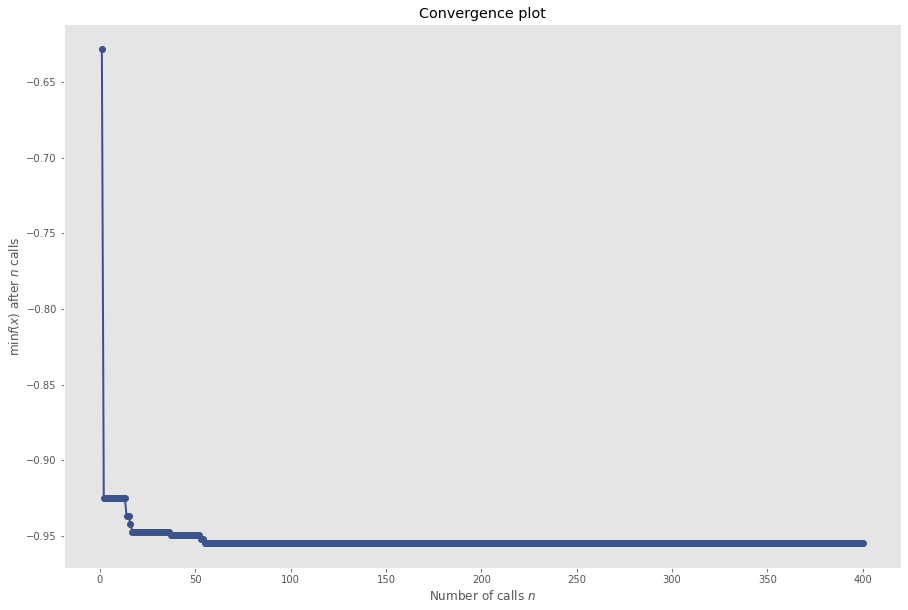

In [ ]:
plt.figure(figsize=(15, 10))
vis = plot_convergence(*opt.optimizer_results_)

<Figure size 1440x1080 with 0 Axes>

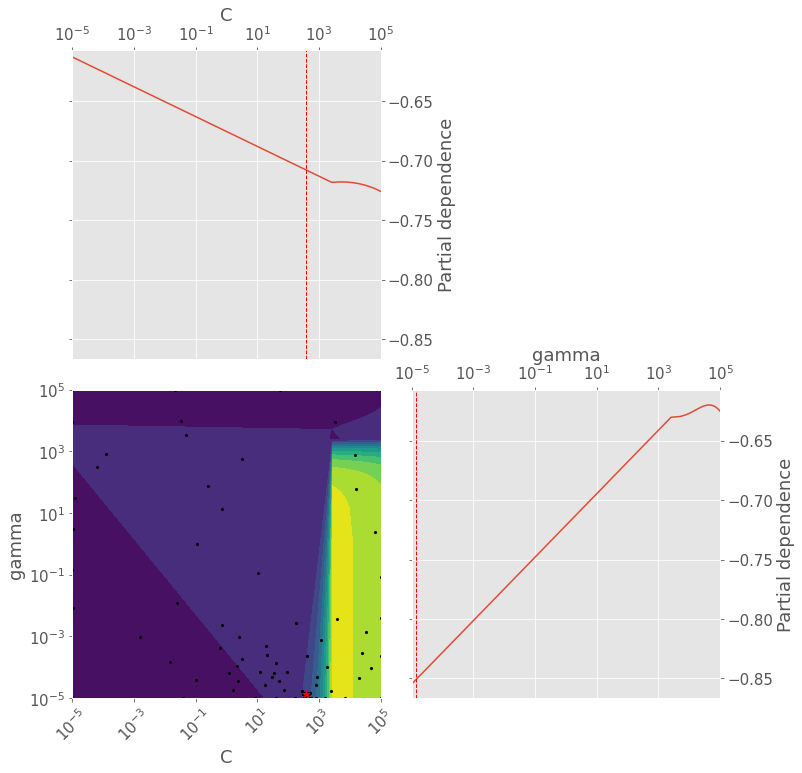

In [ ]:
plt.rc('font', size=15)
plt.rc('lines', mew=5)
plt.figure(figsize=(20, 15))
plot_objective(*opt.optimizer_results_, size=5)
plt.savefig(fname='SVC_BCW_BO.pdf')

In [ ]:
model = SVC(kernel='rbf', C=opt.best_params_['C'], gamma=opt.best_params_['gamma'])
print('SVC, BO, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))

SVC, BO, accuracy on test:
0.9649122807017544
